In [ ]:
from google.colab import drive
from glob import glob
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

drive.mount('/content/drive')
%cd '/content/drive/My Drive/MCS F22/Sem 2/CSC 591 071/ProjC/ECE542_sp2022_Project_TerrainRecognition'

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1Zk3AApaqm3vDMwGNXNZR0OpCJWNLqpqz/ProjC/ECE542_sp2022_Project_TerrainRecognition


In [ ]:
x_files = glob("TrainingData/subject_00*_*__x.csv")
x_time_files = glob("TrainingData/subject_00*_*__x_time.csv")
y_files = glob("TrainingData/subject_00*_*__y.csv")
y_time_files = glob("TrainingData/subject_00*_*__y_time.csv")

print(sorted(x_files))
print(sorted(x_time_files))
print(sorted(y_files))
print(sorted(y_time_files))

['TrainingData/subject_001_01__x.csv', 'TrainingData/subject_001_02__x.csv', 'TrainingData/subject_001_03__x.csv', 'TrainingData/subject_001_04__x.csv', 'TrainingData/subject_001_05__x.csv', 'TrainingData/subject_001_06__x.csv', 'TrainingData/subject_001_07__x.csv', 'TrainingData/subject_001_08__x.csv', 'TrainingData/subject_002_01__x.csv', 'TrainingData/subject_002_02__x.csv', 'TrainingData/subject_002_03__x.csv', 'TrainingData/subject_002_04__x.csv', 'TrainingData/subject_002_05__x.csv', 'TrainingData/subject_003_01__x.csv', 'TrainingData/subject_003_02__x.csv', 'TrainingData/subject_003_03__x.csv', 'TrainingData/subject_004_01__x.csv', 'TrainingData/subject_004_02__x.csv', 'TrainingData/subject_005_01__x.csv', 'TrainingData/subject_005_02__x.csv', 'TrainingData/subject_005_03__x.csv', 'TrainingData/subject_006_01__x.csv', 'TrainingData/subject_006_02__x.csv', 'TrainingData/subject_006_03__x.csv', 'TrainingData/subject_007_01__x.csv', 'TrainingData/subject_007_02__x.csv', 'TrainingDa

In [ ]:
subjects = []
for filename in x_files:
  subjects.append(filename.split('/')[1].replace('__x.csv', ''))
print(sorted(subjects))

['subject_001_01', 'subject_001_02', 'subject_001_03', 'subject_001_04', 'subject_001_05', 'subject_001_06', 'subject_001_07', 'subject_001_08', 'subject_002_01', 'subject_002_02', 'subject_002_03', 'subject_002_04', 'subject_002_05', 'subject_003_01', 'subject_003_02', 'subject_003_03', 'subject_004_01', 'subject_004_02', 'subject_005_01', 'subject_005_02', 'subject_005_03', 'subject_006_01', 'subject_006_02', 'subject_006_03', 'subject_007_01', 'subject_007_02', 'subject_007_03', 'subject_007_04', 'subject_008_01']


## **Visualizaing few samples**
Here we observe that __x.csv has "\_x" files contain our training features and "\_x\_time" files contain their respective timestamps. Similarly, the "\_y" files contain our training labels and "\_y\_time" files contain their timestamps.

In [ ]:
df1=pd.read_csv('TrainingData/' + subjects[0] + '__x.csv',  names =['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
df1.head()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,4.435275,8.196063,2.974488,0.014215,-0.039157,-0.016744
1,4.186920,8.344455,2.908057,0.005771,-0.004480,-0.003345
2,4.544637,8.408659,2.890000,0.007967,0.022412,0.001159
3,4.849308,8.411614,2.900692,0.027778,-0.010670,-0.014223
4,4.509190,8.118649,2.847298,0.021577,-0.045498,-0.021111


In [ ]:
df2=pd.read_csv('TrainingData/' + subjects[0] + '__x_time.csv', names =['time'])
df2.head()

,time
0,0.000
1,0.025
2,0.050
3,0.075
4,0.100


In [ ]:
df3=pd.read_csv('TrainingData/' + subjects[0] + '__y.csv', names =['label'])
df3.head()

,label
0,0
1,0
2,0
3,0
4,0


In [ ]:
df4=pd.read_csv('TrainingData/' + subjects[0] + '__y_time.csv', names =['time'])
df4.head()

,time
0,0.02
1,0.12
2,0.22
3,0.32
4,0.42


So we first merge the x and y dataframes with their timestamps to get two dataframes x_plus_time.csv and y_plus_time.csv

In [ ]:
for filename in subjects:
    df_x=pd.read_csv('TrainingData/' + filename + '__x.csv',  names =['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
    df_x_time=pd.read_csv('TrainingData/' + filename + '__x_time.csv', names =['time'])
    df_x['time']=df_x_time['time']
    df_x['time']=df_x['time'].apply(lambda x:int(x*100)/100)
    df_x['time']=df_x['time'].astype(str)
    df_y=pd.read_csv('TrainingData/' + filename + '__y.csv', names =['label'])
    df_y_time=pd.read_csv('TrainingData/' + filename + '__y_time.csv', names =['time'])
    df_y['time']=df_y_time['time']
    df_y['time']=df_y['time'].astype(str)
    df_x_plus_y = pd.merge(df_x, df_y, on='time', how='outer')

In [ ]:
print(df_x.shape)
df_x.head()

(48138, 7)


,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,time
0,1.306857,9.407257,-2.487257,-0.004376,-0.000034,0.001111,0.0
1,1.343451,9.393098,-2.520354,-0.000866,-0.001356,0.000000,0.02
2,1.322976,9.380536,-2.521071,0.000783,0.001976,0.001275,0.05
3,1.330000,9.386873,-2.500309,-0.003865,-0.001786,0.002706,0.07
4,1.346465,9.390606,-2.522929,-0.000782,-0.000864,0.003169,0.1


In [ ]:
print(df_y.shape)
df_y.head()

(12035, 2)


,label,time
0,0,0.02
1,0,0.12
2,0,0.22
3,0,0.32
4,0,0.42


In [ ]:
print(df_x_plus_y.shape)
df_x_plus_y

(48138, 8)


,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,time,label
0,1.306857,9.407257,-2.487257,-0.004376,-0.000034,0.001111,0.0,NaN
1,1.343451,9.393098,-2.520354,-0.000866,-0.001356,0.000000,0.02,0.0
2,1.322976,9.380536,-2.521071,0.000783,0.001976,0.001275,0.05,NaN
3,1.330000,9.386873,-2.500309,-0.003865,-0.001786,0.002706,0.07,NaN
4,1.346465,9.390606,-2.522929,-0.000782,-0.000864,0.003169,0.1,NaN
...,...,...,...,...,...,...,...,...
48133,2.072244,8.908878,-3.500000,0.001351,0.001191,0.001031,1203.32,0.0
48134,2.085123,8.915123,-3.520000,0.001918,-0.001147,0.000000,1203.34,NaN
48135,2.083774,8.910000,-3.538981,-0.002015,-0.004099,0.001042,1203.37,NaN
48136,2.111447,8.908553,-3.535724,0.000183,-0.001673,0.001856,1203.4,NaN


## **Full Outer Join & Interpolation**
Next, we full outer join the X and y dataframes obtained above based on their common attribute of time. But even after performing full outer join, we still observe that the labels column of the merged dataframe has a lot of missing values. As the sampling rate for the X input stream and y input stream attributes is different, only 1/4 of the data is actually labelled. So, we interpolate the missing labels with existing values using the df.interpolate('pad') method provided of pandas.

In [ ]:
for subject in subjects:
    df_x_plus_time = pd.read_csv('TrainingData/'+subject+'x_plus_time.csv')
    df_y_plus_time = pd.read_csv('TrainingData/'+subject+'y_plus_time.csv')
    df_x_plus_y = pd.merge(df_x_plus_time, df_y_plus_time, on='time', how='outer')
    df_x_plus_y['label']=df_x_plus_y['label'].interpolate(method='pad')
    final_df = df_x_plus_y.loc[df_x_plus_y['time']!=0]
    final_df.to_csv('TrainingData/'+subject+'_interpolated.csv',index=False)
print(final_df.shape)
final_df.head()

(48137, 8)


,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,time,label
1,1.343451,9.393098,-2.520354,-0.000866,-0.001356,0.000000,0.02,0.0
2,1.322976,9.380536,-2.521071,0.000783,0.001976,0.001275,0.05,0.0
3,1.330000,9.386873,-2.500309,-0.003865,-0.001786,0.002706,0.07,0.0
4,1.346465,9.390606,-2.522929,-0.000782,-0.000864,0.003169,0.10,0.0
5,1.356462,9.392924,-2.542924,0.000565,0.003899,0.003879,0.12,0.0


Next, we combine the interpolated individual dataframes that we saved above

In [ ]:
interpolted_dfs=[]
for subject in sorted(subjects):
    filename = 'TrainingData/'+subject+'_interpolated.csv'
    df = pd.read_csv(filename, names =['acc_x','acc_y','acc_z','gyro_x','gyro_y','gyro_z','time','label'])
    interpolted_dfs.append(df)
df1 = pd.concat(interpolted_dfs, axis=0, ignore_index=True)
df2 = df1.loc[df1['acc_x']!='acc_x']
df2.to_csv('TrainingData/Interpolated_combined.csv',index=False)

<ipython-input-9-8ee748ed91a2>:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, names =['acc_x','acc_y','acc_z','gyro_x','gyro_y','gyro_z','time','label'])
<ipython-input-9-8ee748ed91a2>:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, names =['acc_x','acc_y','acc_z','gyro_x','gyro_y','gyro_z','time','label'])


In [ ]:
df=pd.read_csv('TrainingData/Interpolated_combined.csv')
print(df.shape)
df.head()

(1341617, 8)


,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,time,label
0,4.186920,8.344455,2.908057,0.005771,-0.004480,-0.003345,0.02,0.0
1,4.544637,8.408659,2.890000,0.007967,0.022412,0.001159,0.05,0.0
2,4.849308,8.411614,2.900692,0.027778,-0.010670,-0.014223,0.07,0.0
3,4.509190,8.118649,2.847298,0.021577,-0.045498,-0.021111,0.10,0.0
4,4.226515,8.273807,2.851742,0.012534,0.000445,-0.016830,0.12,0.0


## **Handing Imbalanced Data**
Even after interpolating, the data has too many class 0 values than others. As data is highly imbalanced, we balance it using SMOTE Oversampling as show below

array([[<Axes: title={'center': 'label'}>]], dtype=object)

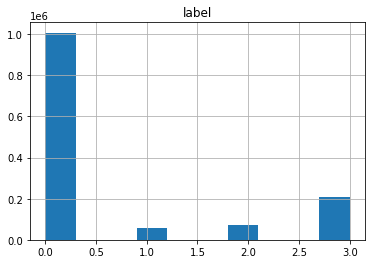

In [ ]:
df.hist('label')

<Axes: >

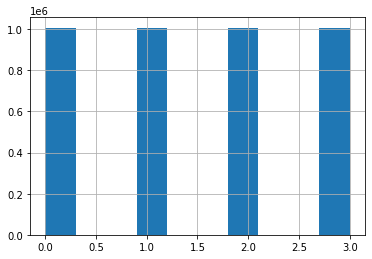

In [ ]:
y_train = df['label']
x_train= df.drop('label', axis=1)
sm = SMOTE(random_state=23)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)
y_train_smote.hist()

## **Train Test Split**
Next, we split the data into training and validation set using an 80:20 ratio

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train_smote, y_train_smote, test_size=0.2,random_state=123)

## **Model Training**
Next, we train a RandomForestClassifier model using 100 estimators

In [ ]:
Random_F_model_100 = RandomForestClassifier(n_estimators=100, random_state=0)
Random_F_model_100.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
saved_model_RF = 'RF_model_smote.sav'
pickle.dump(Random_F_model_100, open(saved_model_RF, 'wb'))

## **Model Evaluation**
We perform validation set predictions and evaluate the model performance based on metrics like F1-score, accuracy, classification report, confusion matrix, etc

In [ ]:
load_model_RF = 'RF_model_smote.sav'
pickle.load(Random_F_model_100, open(load_model_RF))
y_pred = Random_F_model_100.predict(x_val)
print('F1 Score:', metrics.f1_score(y_val, y_pred, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred))
print('Precision score: ', metrics.precision_score(y_val, y_pred, average='macro'))
print('Recall score: ', metrics.recall_score(y_val, y_pred, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred))
print('Confusion Matrix:', metrics.confusion_matrix(y_val, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

F1 Score: 0.9189096865720365
Accuracy Score: 0.9200104777298583
Precision score:  0.919829672079975
Recall score:  0.9199607377639372
Accuracy Score: 0.9200104777298583
Confusion Matrix: [[161759   7136   6092  26194]
 [  2435 196651    970   1230]
 [  1767    607 198424    929]
 [ 12959   2009   2105 184251]]
Mean Absolute Error: 0.19097897253692656
Mean Squared Error: 0.5101698534359257
Root Mean Squared Error: 0.7142617541461433


In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85    201181
         1.0       0.95      0.98      0.96    201286
         2.0       0.96      0.98      0.97    201727
         3.0       0.87      0.92      0.89    201324

    accuracy                           0.92    805518
   macro avg       0.92      0.92      0.92    805518
weighted avg       0.92      0.92      0.92    805518



Confusion Matrix with Normalized Values


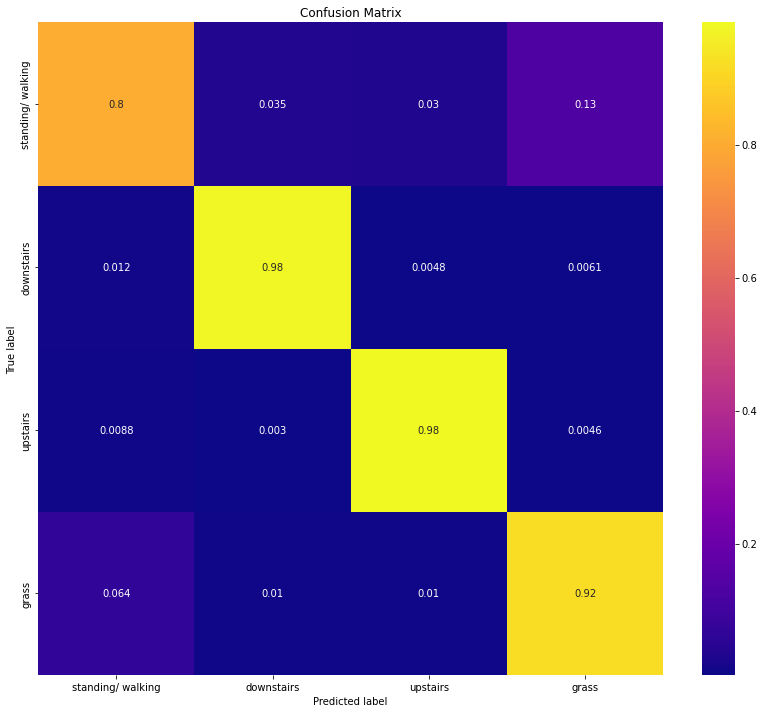

In [ ]:
def plot_confusion_matrix(normalize):
  classes = ['standing/ walking','downstairs', 'upstairs', 'grass']
  tick_marks = [0.5,1.5,2.5,3.5]
  cn = confusion_matrix(y_val, y_pred,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.rcParams["figure.figsize"] = (14,12)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

### **Generating Predictions on Unlabelled Test Data**
Finally we generate and save predictions for unseen test dataset

In [ ]:
test_x_files = glob("TestData/subject_0**_*__x.csv")
print(sorted(test_x_files))

['TestData/subject_009_01__x.csv', 'TestData/subject_010_01__x.csv', 'TestData/subject_011_01__x.csv', 'TestData/subject_012_01__x.csv']


In [ ]:
test_subjects = []
for filename in test_x_files:
  test_subjects.append(filename.split('/')[1].replace('__x.csv', ''))
print(sorted(test_subjects))

['subject_009_01', 'subject_010_01', 'subject_011_01', 'subject_012_01']


In [ ]:
for filename in test_subjects:
    df_x=pd.read_csv('TestData/' + filename + '__x.csv',  names =['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
    df_x_time=pd.read_csv('TestData/' + filename + '__x_time.csv', names =['time'])
    print("########"+filename+"########")
    print(df_x.shape)
    print(df_x_time.shape)
    # df_x['time']=df_x_time['time']
    # df_x['time']=df_x['time'].apply(lambda x:int(x*100)/100)
    # df_x['time']=df_x['time'].astype(str)
    # df_x_time = df_x.loc[df_x['time']!='0.0']
    # preds = Random_F_model_100.predict(df_x_time)
    # pd.DataFrame(preds).to_csv(filename +'__y.csv',index=False)

########subject_012_01########
(45319, 6)
(45319, 1)
########subject_011_01########
(51761, 6)
(51761, 1)
########subject_010_01########
(49081, 6)
(49081, 1)
########subject_009_01########
(37991, 6)
(37991, 1)
